# Audio Machine Learning - Workshop Week 3 - Feature Extraction and Binary Classification
-----

## 0 - Setup and Worksheet Goals

### Overview

In this worksheet you’ll create, load, and manipulate audio data in Python. You'll use this to extract audio features from **bass** and **snare** drums, and fit a Logistic Regression model to the data.

### Goal

By the end of this worksheet, you should be able to:

- Load, create and playback audio files in Python
- Use try/except statements to gracefully handle errors
- Explore how Python Classes work
- Extract features from audio data using pre-defined functions
- Use this to create a feature matrix $X$ with shape $(N,2)$ and labels $y$, then fit `sklearn.linear_model.LogisticRegression`

---
We need to install a couple of additional packages today - The below code installs `librosa` and `soundfile`. This will work in Noteable, if you are running this Notebook locally, you can install these packages in your current Python environment.

In [31]:
# pip install soundfile
# pip install librosa

You can right-click on the above cell once installation is finished, and click 'clear cell output' to clean things up a bit

Now all the below import statement should run without any errors.

In [32]:
import numpy as np
from glob import glob
import os
from os.path import join
import random
import soundfile as sf
import librosa
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import IPython

## 1 - NumPy: Indexing, Shapes and Broadcasting

Understanding NumPy array shapes, and broadcasting, is essential to manipulating data for Machine Learning in Python. By the end of this section you should be able to:
- Understand how datasets of features and labels are represented in NumPy
- Use NumPy functions/methods for viewing and manipulating NumPy array shapes
- Use *indexing* and *slicing* to access data from a NumPy array
- Use *broadcasting* to apply the same operation to every row of a NumPy array
In this worksheet, we will be representing each audio clip with *two features*, *ZCR* and *Spectral Centroid*, so `X.shape` should be $(N,2)$, where $N$ represents the number of data examples held in `X`.

---- 
### 1.1 Indexing NumPy Arrays

Slicing and Indexing can be applied to NumPy Arrays, which can be 1-Dimensional, 2-Dimensional (like a matrix), or even higher dimensions.

See the below examples.

----- 
#### 1D Arrays
In 1D arrays, indexing and slicing works the same as lists:

In [58]:
# a 1D array
a = np.array([10, 20, 30, 40])
print("1D array:", a)
print(f"array {a}, has {a.ndim} dimensions, and has shape {a.shape}")
print("First element:", a[0]) # 'Indexing'
print("Last element:", a[-1]) # 'Indexing'
print("First three elements:", a[0:3]) # 'Slicing'

1D array: [10 20 30 40]
array [10 20 30 40], has 1 dimensions, and has shape (4,)
First element: 10
Last element: 40
First three elements: [10 20 30]


----- 
#### 2D Arrays
In 2D arrays, we use `[row, column]` indexing and slicing:

In [59]:
# 2D array (matrix)
A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])

print("2D array:\n", A)
print(f"array A, has {A.ndim} dimensions, and has shape {A.shape}")
print("Element at row 0, column 1:", A[0, 1]) # Indexing
print("First row:", A[0, :]) # Indexing
print("Last column:", A[:, -1]) # Indexing
print("First two elements of second row:", A[1, 0:2]) #Index for 1st dimension, Slice for 2nd dimension

2D array:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
array A, has 2 dimensions, and has shape (3, 4)
Element at row 0, column 1: 2
First row: [1 2 3 4]
Last column: [ 4  8 12]
First two elements of second row: [5 6]


----- 
#### 3D Arrays
In 3D arrays, we just add a third index:

In [60]:
# 3D array example
B =  np.array([[[0,  1,   2,   3],
                [4,  5,   6,   7],
                [8,  9,  10,  11]],
               [[12, 13, 14,  15],
                [16, 17, 18,  19],
                [20, 21, 22,  23]]])
print("3D array:\n", B)
print(f"array B, has {B.ndim} dimensions, and has shape {B.shape}")
print("Element at B[0, 0, 0]:", B[0, 0, 0]) # Indexing
print("Element at B[1, 0, 0]:", B[1, 0, 0]) # Indexing

3D array:
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
array B, has 3 dimensions, and has shape (2, 3, 4)
Element at B[0, 0, 0]: 0
Element at B[1, 0, 0]: 12


---
### ✏️✏️ Exercise: Making a Matrix ✏️✏️
---

`np.arange()` creates a numpy array as follows:

In [36]:
print(np.arange(10))

[0 1 2 3 4 5 6 7 8 9]


`array.reshape()` changes the shape of an existing arrays, as follows:

In [37]:
arr = np.arange(10)

print("1D array:\n", arr)
print(f"array arr, has {arr.ndim} dimensions, and has shape {arr.shape}")

arr = arr.reshape(2,5)
print("2D array:\n", arr)
print(f"array arr, has {arr.ndim} dimensions, and has shape {arr.shape}")

1D array:
 [0 1 2 3 4 5 6 7 8 9]
array arr, has 1 dimensions, and has shape (10,)
2D array:
 [[0 1 2 3 4]
 [5 6 7 8 9]]
array arr, has 2 dimensions, and has shape (2, 5)


Your Task:

Create the Matrix:

$$
C = \begin{bmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10 & 11 & 12 \\
13 & 14 & 15 & 16 \\
17 & 18 & 19 & 20
\end{bmatrix}
$$

1. Make a 5x4 array, `C`, using `np.arange()` and `.reshape()`.  
2. Print out the second row and save this to variable `second_row`.  
3. Print out the third column and save this to variable `third_column`. 
4. Print out the bottom-right 2x2 block, and save this to variable `block`.

In [38]:
# Your Code Here!
C = np.arange(1,21).reshape(5,4)
second_row = C[1,:]
third_column = C[:,2]
block = C[3:5,2:4]

In [39]:
block


array([[15, 16],
       [19, 20]])

In [40]:
# Run this cell to check your answer
assert np.max(second_row - np.array([5,6,7,8])) == 0
assert np.max(third_column - np.array([3,7,11,15,19])) == 0
assert np.max(block - np.array([[15, 16], [19, 20]])) == 0

---
### 1.2 Toy Dataset: Create Synthetic Data
The below cell generates synthetic data.

In [41]:
# Toy features for N examples (pretend these came from audio clips)
zcr = np.array([0.05, 0.06, 0.04, 0.18, 0.20, 0.16])            # feature 1
centroid = np.array([800, 900, 750, 2500, 2700, 2300])          # feature 2
print(f'zcr array shape: {zcr.shape}')
print(f'spectral centroid array shape: {centroid.shape}')

# Toy labels: 0 = bass, 1 = snare (example only)
y = np.array([0, 0, 0, 1, 1, 1])

# Build feature matrix X with shape (N, 2)
X = np.column_stack([zcr, centroid])

print("X shape:", X.shape)
print("X number of dimensions:", X.ndim)
print("y shape:", y.shape)
print("y number of dimensions:", y.ndim)
print("X:\n", X)
print("y:\n", y)

zcr array shape: (6,)
spectral centroid array shape: (6,)
X shape: (6, 2)
X number of dimensions: 2
y shape: (6,)
y number of dimensions: 1
X:
 [[5.0e-02 8.0e+02]
 [6.0e-02 9.0e+02]
 [4.0e-02 7.5e+02]
 [1.8e-01 2.5e+03]
 [2.0e-01 2.7e+03]
 [1.6e-01 2.3e+03]]
y:
 [0 0 0 1 1 1]


Shape is important because built-in libraries are designed to expect arrays with specific shapes.

Scikit-learn expects:
- `X` is 2-Dimensional: shape `(N, j)` 
- `y` is 1-Dimensions: shape `(N,)`
- $N$ is the number of examples, $j$ is the number of features. The first dimension $N$ is often called the **Batch** dimension.

A common mistake is to accidentally have labels of shape `(N, 1)`. The below code shows how to add and remove a dimension from an array.

In [42]:
y_col = y.reshape(-1, 1)     # (N, 1), adds an additional dimensions
y_flat = y_col.squeeze()     # back to (N,), squeeze removes dimensions with length 1

print("y_col shape:", y_col.shape)
print("y_flat shape:", y_flat.shape)

y_col shape: (6, 1)
y_flat shape: (6,)


If you ever see `y` with shape `(N, 1)` in later sections, you can fix it with `y = y.squeeze()`.

---
### ✏️✏️ Exercise: Adding and Removing Dimensions ✏️✏️
---
Practice turning a 1D array into row/column vectors, adding a “batch” dimension, and removing size-1 dimensions safely.

Complete the following lines marked #TODO according to the instructions:

In [43]:
v = np.array([10, 20, 30, 40])  # shape (4,)
print("v.shape =", v.shape)

v.shape = (4,)


#### 1) Add a row dimension so v_row has shape (1, 4)

In [44]:
v_row = v.reshape(1,4)
assert v_row.shape == (1, 4), f"Expected (1,4), got {v_row.shape}"

#### 2) Add a column dimension so v_col has shape (4, 1)

In [45]:
v_col = v.reshape(4,1)
assert v_col.shape == (4, 1), f"Expected (4,1), got {v_col.shape}"

#### 3) Add a batch dimension to v_row so v_batch has shape (1, 1, 4)

In [46]:
v_batch = v.reshape(-1,1,4)
assert v_batch.shape == (1, 1, 4), f"Expected (1,1,4), got {v_batch.shape}"

#### 4) Remove all size-1 dimensions from v_batch.
The result should come back to shape (4,)

In [47]:
v_back = v_batch.squeeze()
assert v_back.shape == (4,), f"Expected (4,), got {v_back.shape}"
np.testing.assert_array_equal(v_back, v)

#### 5) Compute the mean of v_col down the rows (axis=0) but KEEP the dimension.
Expected shape: (1, 1). Expected value: [[25.]]

*HINT*: Keeping dimensions in reductions: keepdims=True in np.mean(...)

In [48]:
v_mean_keep = np.mean(v_col,keepdims=True)
assert v_mean_keep.shape == (1, 1), f"Expected (1,1), got {v_mean_keep.shape}"
np.testing.assert_allclose(v_mean_keep, np.array([[25.0]]))

---
### 1.3 Broadcasting: Feature Scaling with One Line of NumPy

Broadcasting is NumPy’s rule for applying operations between arrays of different shapes. We used broadcasting already, to apply the Linear Regression model to some data.

Here’s the pattern we’ll use constantly in ML:
- Compute a per-feature mean and standard deviation (shape (j,))
- Subtract/divide from the full dataset X (shape (N, j)) using broadcasting
- This standardises each feature so it has mean ~0 and standard deviation ~1.

In [49]:
mu = X.mean(axis=0)      # shape (2,) - finds the mean of each column of X
sigma = X.std(axis=0)    # shape (2,) - finds the standard deviation of each of column of X

print("mu shape:", mu.shape, "mu:", mu)
print("sigma shape:", sigma.shape, "sigma:", sigma)

mu shape: (2,) mu: [1.15000000e-01 1.65833333e+03]
sigma shape: (2,) sigma: [6.62696512e-02 8.50694161e+02]


In [50]:
Xz = (X - mu) / sigma

print("Xz shape:", Xz.shape)
print("mean of Xz (per feature):", Xz.mean(axis=0))
print("std  of Xz (per feature):", Xz.std(axis=0))

Xz shape: (6, 2)
mean of Xz (per feature): [-5.55111512e-17  1.29526020e-16]
std  of Xz (per feature): [1. 1.]


Conceptually, in the above example broadcasting automatically changes the shape of the arrays `mu` and `sigma` to `(N,2)` before carrying out element-wise addition/division

In [51]:
print("X shape:", X.shape)       # (N, 2)
print("mu shape:", mu.shape)     # (2,)

# Broadcasting conceptually turns mu into shape (N, 2) without copying
X_minus_mu = X - mu
print("X_minus_mu shape:", X_minus_mu.shape)

X shape: (6, 2)
mu shape: (2,)
X_minus_mu shape: (6, 2)


---
### ✏️✏️ Exercise: Mean Subtraction ✏️✏️
---
Complete the following lines marked #TODO according to the instructions:

In [52]:
Z = np.array([
    [1.0,  10.0],
    [3.0,  20.0],
    [5.0,  30.0],
])  
print("Z shape:", Z.shape)
print(f'Z has {Z.shape[0]} rows and {Z.shape[1]} columns')

Z shape: (3, 2)
Z has 3 rows and 2 columns


#### 1) Compute the mean of each column (feature). Expected shape: (2,)

In [53]:
mu = np.mean(Z,axis=0)
assert mu.shape == (2,), f"Expected (2,), got {mu.shape}"

#### 2) Center the data using broadcasting: subtract mu from every row of Z.

In [54]:
Z_centered = Z - mu
assert Z_centered.shape == Z.shape

#### Checks
Each column should now have mean 0

In [55]:
np.testing.assert_allclose(Z_centered.mean(axis=0), np.array([0.0, 0.0]))

Centering should not change the "spread" (standard deviation, std) of each column

In [56]:
np.testing.assert_allclose(Z_centered.std(axis=0), Z.std(axis=0))

## 2 - Exceptions in Python

In this section, you'll learn about Python Exceptions, which are a method for handling errors in Python. This will include
- `try`/`except` statements
- Catching specific exceptions
- Raising exceptions and using assert
- Audio file Input/Output (I/O) patterns for loading audio files

When working with files, there will often be problems, such as missing files or corrupted data). Exceptions allow you to anticipate these problems and tell your code what to do if these problems arise.

---

Exceptions are different to syntax errors. A syntax error occurs when an incorrect Python statement is detected, for example:

In [57]:
for n in (1, 2):
    print(n)) # The extra bracket means this code will not run!

SyntaxError: unmatched ')' (1308769366.py, line 2)

In [ ]:
def function():
a = unindented block # An indentation error is another kind of syntax error.

IndentationError: expected an indented block after function definition on line 1 (4118763252.py, line 2)

Here is another code that will produce an error:

In [ ]:
x = 0
y = 1
print(y/x)

ZeroDivisionError: division by zero

This type of error is called an **exception error**. This means that the syntax of the Python code was correct, but an error was produced when running the code. The error message tells you what kind of error occurred, in this case the error is a `ZeroDivisionError` - Python doesn't know what to do when dividing by zero, so it **raises an exception error**.

There are many types of built-in Python exception errors, you can read about them [here](https://docs.python.org/3/library/exceptions.html).

#### 2.1 `try` / `except` statements
If you anticipate that you might encounter a certain kind of exception error in your code, you can use a try/except statement
- `try`: run code that might raise an exception
- `except`: what to do if a specific exception occurs
Here is an example:

In [61]:
y = 5
x = [5, 2, 7, 2, 0, 8]
y_over_x = [] # I want to make a list of y/x for every value of x
for item in x:
    try:
        y_over_x.append(y/item) # Try and find y/x
    except ZeroDivisionError: # This statement runs if a ZeroDivisionError exception is raised 
        y_over_x.append('infinity') 
        
print(y_over_x)

[1.0, 2.5, 0.7142857142857143, 2.5, 'infinity', 0.625]


The above code now handles the ZeroDivisionError by appending 'infinity' to the list instead. If the exception is not handled like this, the program will crash.

---
### ✏️✏️ Exercise: Catching the Error✏️✏️
---

The following code attempts to convert a list of strings into a list of integers, using the `int()` function. Currently the code will crash if it encounters a string that the `int()` function can't handle.

Use a `try` / `except` statement to catch this kind of error. Look at the error message to see what type of Error is raised. Write an except statement that appends the value `None` to the list if that type of error is raised.


In [62]:
values = ["42", "3.14", "abc", "-7"]
result = []
# Your code here
for s in values:
    try:
        result.append(int(s))
    except ValueError:
        result.append(None)

In [63]:
# Check your answer
assert result == [42, None, None, -7], f"Got {result}"
print("Correct!")

Correct!


-----

#### 2.2 Catching specific Exceptions
You should always try to catch narrowest exception you expect. Common exceptions you might encounter are:
- ValueError: wrong value (e.g., "abc" to int)
- TypeError: wrong type (e.g., adding int to str)
- FileNotFoundError: missing file
- ZeroDivisionError: division by zero

It is possible not to specify the error type, but this poor practice and can hide bugs in your code:

In [64]:
# Bad: catches everything (can hide real bugs)
x = 'abc'
try:
    y = int(x)
except Exception:
    print('Some error occurred!')

Some error occurred!


In [65]:
# Better: be specific about error types
try:
    y = int(x)
except TypeError:
    print('TypeError occurred!')
except ValueError:
    print('ValueError occurred!')

ValueError occurred!


---
### ✏️✏️ Exercise: Catching Specific Exceptions ✏️✏️
---

There are two different types of errors that will occur in the below for-loop. Write a try/except block which catches the two error types, and appends a string describing the error to the result list.



In [66]:
values = ["42", "3.14", "abc", "-7", None]
result = []
# Your code here
for s in values:
    try:
        result.append(int(s))
    except ValueError:
        result.append("ValueError")
    except TypeError:
        result.append("TypeError")

print(result)

[42, 'ValueError', 'ValueError', -7, 'TypeError']


---
#### 2.3 `else` and `finally`

- Use `else` when you want to run code only if the try block succeeded (no Exceptions raised).
- Use `finally` for cleanup, runs regardless of success or failure. 

In [67]:
# The below function does division, with error handling for ZeroDivision.
def safe_divide(a, b):
    result = None
    try:
        result = a / b
    except ZeroDivisionError:
        result = None
    else:
        # Only runs if no exception occurred
        result = float(result)
    finally:
        # Always runs (e.g., log, cleanup)
        completed = True
    return result

In [68]:
print(safe_divide(10, 2))  # 5.0
print(safe_divide(10, 0))  # None

5.0
None


---
### ✏️✏️ Exercise: Catching Specific Exceptions ✏️✏️
---

The below code asks the user for an index, then attempts to select that item from the list. Use except statements to handle the following errors:
- The user enters a non-integer input
- The user enters an index that is out of range of the list

In [69]:
items = ["apple", "banana", "cherry", "date"]

idx_str = input("Enter an index (0-3): ")

# print(items[idx])

try:
    idx = int(idx_str) # TODO: convert idx_str to int
    item = items[idx]# TODO: get the item at that index
    pass
except IndexError: # TODO: Add exceptions for the two errors described above
    print("Need a number between 0 - 3")
    pass
except ValueError:
    print(f"Expected integer [0-3], received {idx_str}")
    pass
else:
    print(item) # TODO: print the selected item
    pass
finally:
    print("Done") # TODO: print a small 'done' message
    pass

cherry
Done


----
## 3 - Python Classes

Python is an **object oriented** programming language.

This means almost everything in Python is an **object**. An object in Python is a type data structure that can have properties and methods.

- A **class** is like a blueprint for an object.
- An **object** is an instance of a class.

An instance of a class can have:
- **Attributes** (data stored as part of the object)
- **Methods** (functions that belong to the object)

I know that this all sounds very abstract! So we can demonstrate this using some examples.

Class definitions usually look something like this:

In [70]:
# Defining a class
class Track: # This defines a class with the name 'Track'
    def __init__(self, title, artist, plays): # This is the class 'constructor', a method 
        self.title = title                    # that runs whenever a class instance                  
        self.artist = artist                  # is created 
        self.plays = plays
    
    def print_information(self):  # This is a class method
        print(f"Track title: {self.title}")
        print(f"Track artist: {self.artist}")
        print(f"Track plays: {self.plays}")
    

We can then create an **instance** of a class as follows:

In [71]:
song_1 = Track('song_1', 'artist_1', 500)
print(type(song_1)) # song_1 is of type 'Track'

<class '__main__.Track'>


An instance of a class can call a class method as follows:

In [72]:
song_1.print_information()

Track title: song_1
Track artist: artist_1
Track plays: 500


In Class definitions, 'self' is used to set and access class attributes.

Inside a class method, self.attribute, returns the value assigned to that attribute.

From outside the class, you can also access the attributes of a class instance:

In [73]:
print(song_1.title)

song_1


The main use of classes is when you want to create many separate objects, that each share some attributes and methods. For example:

In [74]:
song_1 = Track('song_1', 'artist_1', 500)
song_1.print_information()


Track title: song_1
Track artist: artist_1
Track plays: 500


In [75]:
song_2 = Track('another song title', 'a different artist', 48)
song_2.print_information()

Track title: another song title
Track artist: a different artist
Track plays: 48


---
### ✏️✏️ Exercise: Use the Track Class ✏️✏️
---

Use the `Track` class defined above. Create an instance of the class called:

`new_track`

The title of the track should be:

  - 'yet another song title'

The artist should be:

  - 'a different artist'

The number of plays should be:

  - 250


In [76]:
# Your code here
new_track = Track("yet another song title","a different artist",250)

#### Checks

In [77]:
assert new_track.title == 'yet another song title', f'song title is {new_track.title}, not "yet another song title"'
assert new_track.artist == 'a different artist', f'artist is {new_track.artist}, not "a different artist"'
assert new_track.plays == 250, f'song has {new_track.plays}, not 250'
print('all checks passed!')

all checks passed!


## 4 - Audio in Python

Now we will look at loading, visualising and saving audio in Python. To start we need to install some additional packages, and import some packages.

#### 4.1 - Generating a Sine Wave

The below function generates a sine wave.

$y = Asin(2\pi ft + \phi)$

- The length argument determines the length of the sine wave in seconds
- The frequency argument determines the frequency of the sine wave in Hz
- The sample_rate argument determines the sample rate the sine wave is sampled at
- The phase argument determines the phase term of the sine wave, $\phi$
- The amplitude arguments determines the amplitude of the sine wave, $A$

In [78]:
def sin_wave(length, frequency, sample_rate, phase = 0, amp = 1):
    n = int(round(length * sample_rate)) # Total number of samples
    t = np.arange(n) / float(sample_rate)  # 0, 1/sr, 2/sr ..., (n-1)/sr
    return amp*np.sin(2*np.pi*frequency*t + phase), t

Let's generate a sine wave, that is 2 seconds long, at a frequency of 100 Hz, and a sample rate of 44100.

In [79]:
sine, tAx = sin_wave(2, 100, 44100)
print(f'the sine wave is a NumPy Array with shape: {sine.shape}')

the sine wave is a NumPy Array with shape: (88200,)


Text(0, 0.5, 'Amplitude')

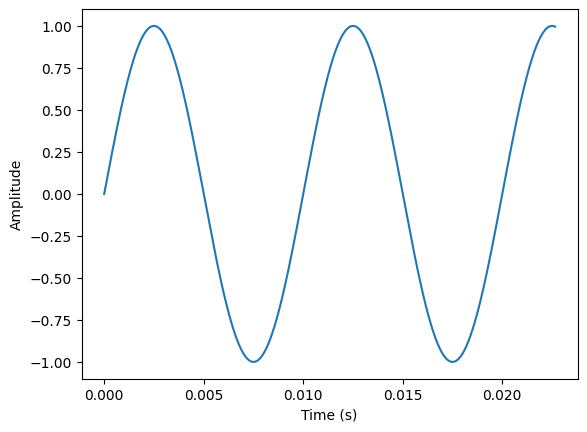

In [80]:
# Plot the first 1000 samples of the Sine wave, tAx is the time-axis
plt.plot(tAx[0:1000], sine[0:1000])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


IPython.display.Audio() allows you play an audio file right here in this notebook! call IPython.display.Audio() and provide the following arguments:

- 'data' - this should be a numpy array holding audio data
- 'rate' - this should be set to sample rate of the audio data


In [ ]:
IPython.display.Audio(data = sine, rate=44100)

This should allow you to listen to the sine wave. 

---
### ✏️✏️ Exercise: Generating and Summing Sine Waves ✏️✏️
---

Generate three sine waves, with the following parameters
1. $f_1 = 100$, $A_1 = 0.2$, $\phi_1 = \pi/4$
2. $f_2 = 200$, $A_2 = 0.3$, $\phi_2 = \pi/2$
3. $f_3 = 300$, $A_3 = 0.1$, $\phi_3 = 0$

Plot each sine wave and listen to each sine wave individually, then sum the sine waves together. Plot and listen to the resulting summed sinusoid.

For all sine waves, use the sample_rate of $fs=44100$.

In [81]:
# Your code here
global_sample_rate = 44100
wave_1 = sin_wave(2,100,sample_rate=global_sample_rate,phase=(np.pi/4),amp=0.2)
wave_2 = sin_wave(2,200,sample_rate=global_sample_rate,phase=(np.pi/4),amp=0.3)
wave_3 = sin_wave(2,300,sample_rate=global_sample_rate,phase=(np.pi/4),amp=0.1)

sum_wave = wave_1 + wave_2 + wave_3
IPython.display.Audio(data = sum_wave, rate=global_sample_rate)

------
#### 4.2 - Reading Audio Data from file

This worksheet should have come with an accompanying audio file repository, called 'Audio'. It contains some audio files. We can load an audio file using Librosa.

In [82]:
bass_drum, sample_rate = librosa.load('Audio/Bass Sample 1.wav', mono=True, sr=None)
# mono=True converts to mono (one channel of audio)
# sr=None loads the file at whatever sample rate it was recorded at

In [83]:
IPython.display.Audio(data = bass_drum, rate=sample_rate)
# Always be sure to set the right sample rate when playing back audio

import librosa
import numpy as np
import plotly.graph_objects as go


# Time axis
t = np.arange(len(bass_drum)) / sample_rate


# Plot
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=t,
    y=bass_drum,
    mode="lines",
    name="Waveform"
))

fig.update_layout(
    title="Interactive Audio Waveform",
    xaxis_title="Time (s)",
    yaxis_title="Amplitude",
    height=400
)

fig.show()


An audio array is a time-series consisting of samples. The sample rate (measured in Hz) describes how many samples there are in one-second of audio. The total length of an audio array in seconds is:

length (in seconds) = number of samples/sample rate

So, the above file is:

In [ ]:
print(f'Audio/Bass Sample 1.wav is: {bass_drum.shape[0]/sample_rate} seconds long')

Audio/Bass Sample 1.wav is: 2.0 seconds long


This information can be used to find the instant in time each sample of the waveform corresponds to:

0.0
1.9999773242630385


Text(0, 0.5, 'Amplitude')

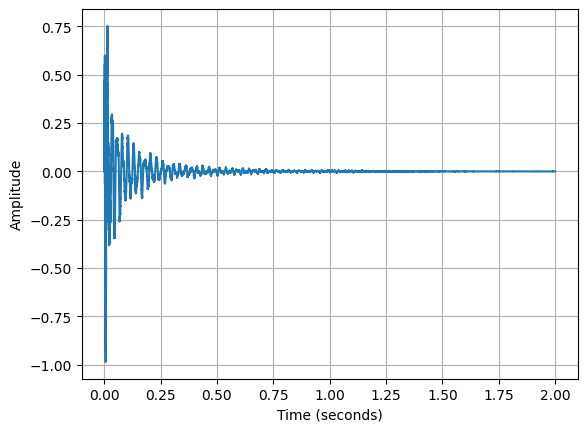

In [84]:
time = np.arange(0, bass_drum.shape[0])/sample_rate
print(time[0])
print(time[-1])
plt.plot(time, bass_drum)
plt.grid()
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

---
### ✏️✏️ Exercise: Loading a Snare ✏️✏️
---

Load and play back one of the snare samples from the Audio directory. Plot the waveform, including the time-axis.

0.0
1.9999773242630385


Text(0, 0.5, 'Amplitude')

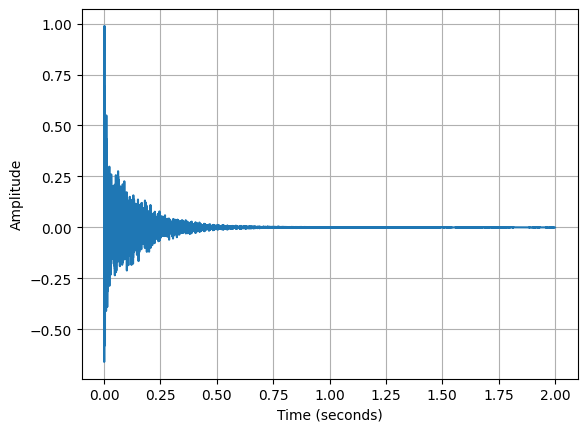

In [85]:
snare, sample_rate = librosa.load('Audio/Snare Sample 1.wav', mono=True, sr=None)

time = np.arange(0, snare.shape[0])/sample_rate
print(time[0])
print(time[-1])
plt.plot(time, snare)
plt.grid()
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')


## 5 - Feature Extraction

Now we will look at extracting audio features from our audio data.

#### 5.1 - Zero-Crossing Rate

Below is a function that calculates the zero crossing rate from an audio vector:

In [86]:
import numpy as np

def zero_crossing_rate(x):
    """
    Compute the zero-crossing rate for a 1D audio signal.
    
    Parameters
    ----------
    x : NumPy Array
        Audio signal. Shape (n_samples,).
        
    Returns
    -------
    float
        Zero-crossing rate (range [0, 1]).
    """
    x = np.asarray(x, dtype=float)

    x_sign = np.where(x>0, 1, 0)
    x_diff = np.diff(x_sign)
    return np.mean(np.abs(x_diff))

Run the below code to check it works! You can calculate the zero-crossing rate manually and compare it to the function output.

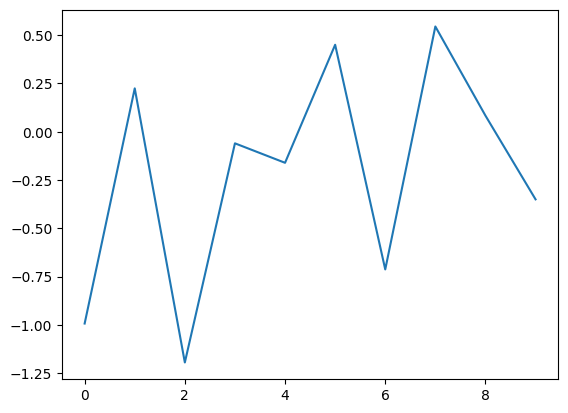

In [87]:
random_x = np.random.randn(10)
zcr_1 = zero_crossing_rate(random_x)
plt.plot(random_x)

In [88]:
print(f'{random_x}\n has a zcr of: {zcr_1}')

[-0.99292996  0.22447397 -1.1944626  -0.06007367 -0.16084414  0.45016215
 -0.71280336  0.54479035  0.08323985 -0.35005695]
 has a zcr of: 0.6666666666666666


### 5.2 - Spectral Centroid

Below is a function that calculates the Spectral Centroid from an audio vector:

In [89]:
def spectral_centroid(x, sr):
    """
    Compute the spectral centroid of an audio signal, in Hz.
    The centroid is computed once for the entire signal.

    Formula:
        centroid = sum(f_k * |X_k|) / sum(|X_k|)
    where X_k is the FFT and f_k are bin center frequencies. |X| denotes the absolute of X

    Args:
        x : NumPy Array
            Audio signal. Shape (n_samples,).
        sr (int or float): Sampling rate in Hz.

    Returns:
        float: Spectral centroid in Hz.

    """
    # Real FFT and frequency bins
    X = np.fft.rfft(x)
    f = np.fft.rfftfreq(x.shape[0], d=1.0 / sr)

    # Take absolute
    X_abs = np.abs(X)

    # Find denominator
    denom = X_abs.sum()

    if denom <= 1e-12: # If input is silent, return 0
        return 0.0 
    
    # Calculate spectral centroid
    centroid_hz = (f * X_abs).sum() / denom
    return centroid_hz

In [90]:
bass_drum, sample_rate = librosa.load('Audio/Bass Sample 1.wav', mono=True, sr=None)
spectral_centroid(bass_drum, sample_rate)

np.float64(1882.0487498653501)

## 6 - Dataset Creation

### ✏️✏️ Exercise: Loading the Dataset ✏️✏️

Now you have all the components required to load the audio files in the directory 'Audio', extract the features, and compare them by class.

---
Load the 40 bass drum samples, and the 40 snare drum samples, and extract audio features from them. The file names follow the pattern:
- 'Bass Sample n.wav'
- 'Snare Sample n.wav'

Use a `for loop` to load each audio file in turn, and:
- Load the audio file using librosa.load()
- Extract the features, ZCR and Spectral Centroid
- Keep a separate list for each class and feature, to hold the extracted features, this should result in four lists: `zcr_snare`, `zcr_bass`, `sc_snare`, `sc_bass`

This should result in:
 - 40 values of ZCR for the snare drums
 - 40 values of spectral centroid for the snare drums
 - 40 values of ZCR for the bass drums
 - 40 values of spectral centroid for the bass drums

Hint: The filenames can be created using the range function, as shown below:

In [91]:
zcr_snare, zcr_bass, sc_snare, sc_bass = [], [], [], []

for n in range(5):
    print(f'a filename {n}')

a filename 0
a filename 1
a filename 2
a filename 3
a filename 4


In [ ]:
# Your code here!

from collections import defaultdict
from pathlib import Path
import re

audio_Data = []
global_sample_rate = 44100

snare_pattern = r"^Snare Sample.*\.wav$"
bass_pattern  = r"^Bass Sample.*\.wav$"

directory = Path("./Audio")

snare_re = re.compile(r"^Snare Sample.*\.wav$", re.IGNORECASE)
bass_re  = re.compile(r"^Bass Sample.*\.wav$",  re.IGNORECASE)

snare_count = 0
bass_count = 0

for p in directory.iterdir():
    if not p.is_file():
        continue

    name = p.name

    if snare_re.match(name):
        drum_type = "snare"
    elif bass_re.match(name):
        drum_type = "bass"
    
    x,sample_rate = librosa.load(f"Audio.\\{name}", sr=global_sample_rate)
    zcr = zero_crossing_rate(x)
    spec_cent = spectral_centroid(x,global_sample_rate)
    
    audio_Data.append(
        {"file_name":name,
        "drum_type": drum_type,
        "zcr": zcr,
        "spectral_centroid": spec_cent
        }
    )

audio_Data

[{'file_name': 'Bass Sample 1.wav',
  'drum_type': 'bass',
  'zcr': np.float64(0.020895928525266727),
  'spectral_centroid': np.float64(1882.0487498653501)},
 {'file_name': 'Bass Sample 10.wav',
  'drum_type': 'bass',
  'zcr': np.float64(0.03566933865463327),
  'spectral_centroid': np.float64(2170.936231473991)},
 {'file_name': 'Bass Sample 11.wav',
  'drum_type': 'bass',
  'zcr': np.float64(0.03708658828331387),
  'spectral_centroid': np.float64(2517.3418197622095)},
 {'file_name': 'Bass Sample 12.wav',
  'drum_type': 'bass',
  'zcr': np.float64(0.019614734860939467),
  'spectral_centroid': np.float64(2053.701235738863)},
 {'file_name': 'Bass Sample 13.wav',
  'drum_type': 'bass',
  'zcr': np.float64(0.011417363008650892),
  'spectral_centroid': np.float64(2470.3431150942088)},
 {'file_name': 'Bass Sample 14.wav',
  'drum_type': 'bass',
  'zcr': np.float64(0.005317520606809601),
  'spectral_centroid': np.float64(2347.860070236894)},
 {'file_name': 'Bass Sample 15.wav',
  'drum_type': 

#### Checks

In [ ]:
assert len(bass_zcr) == len(bass_centroid), "Bass feature lists are different lengths"
assert len(snare_zcr) == len(snare_centroid), "Snare feature lists are different lengths"

N_bass = len(bass_zcr)
N_snare = len(snare_zcr)
print("N_bass:", N_bass, "N_snare:", N_snare)

NameError: name 'bass_zcr' is not defined

Now, create a scatter plot of the two classes. The x-axis should show ZCR, and the y-axis should show Spectral Centroid. The two classes should be shown as different coloured markers.

---

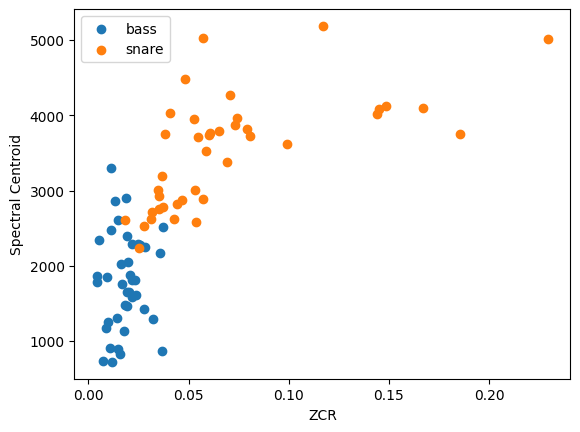

In [93]:
import pandas as pd

df = pd.DataFrame(audio_Data)

for name, group in df.groupby("drum_type"):
    plt.scatter(group["zcr"], group["spectral_centroid"], label=name)

plt.xlabel("ZCR")
plt.ylabel("Spectral Centroid")
plt.legend()
plt.show()

#### 6.1 - Creating Data Arrays

From the data extracted earlier you can create a numpy array of shape $(N,)$ for each of features.

We will fit a logistic regression model to this data, using scikit-learn.
scikit-learn expects:
- Feature matrix $X$: shape $(N, 2)$
  - Each row represents one audio clip
  - The columns represet [zcr, centroid]
- Label vector $y$: shape $(N,)$
  - One label per clip (0 or 1)

### ✏️✏️ Exercise: Creating Dataset Arrays ✏️✏️

Create the feature matrix $X$, and label vector $y$, as described above. If you are unsure how to proceed, you can see section 1.2 for an example. You can also use np.zeros() and np.ones() to generate labels.

In [97]:
# Exploration
df = pd.DataFrame(audio_Data)

# Training-ready data
X = df[["zcr", "spectral_centroid"]].to_numpy()
y = df["drum_type"].map({"snare": 0, "bass": 1}).to_numpy()



#### Checks

In [ ]:
N_total = N_bass + N_snare

assert X.shape == (N_total, 2), f"Expected X shape {(N_total,2)}, got {X.shape}"
assert y.shape == (N_total,), f"Expected y shape {(N_total,)}, got {y.shape}"

# Check there are no NaNs/infs
assert np.isfinite(X).all(), "X contains NaN or inf"

## 7 - Logistic Regression with SkLearn

#### 7.1 - Train/Test Split

Before fitting our model, we should create an unseen **test** dataset for evaluation. This test datatset should **NEVER** be used to optimise the parameters of our model.

We can create a random split using the sklearn function `train_test_split`. `stratify=y` keeps the class balance similar in train and test sets.

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test: ", X_test.shape,  "y_test: ", y_test.shape)


X_train: (64, 2) y_train: (64,)
X_test:  (16, 2) y_test:  (16,)


#### 7.2 - Scaling

ZCR and spectral centroid are on very different numeric scales, so it is a good idea to scale features before logistic regression. We can do this using the sklearn class `sklearn.preprocessing.StandardScaler`.

In [100]:
from sklearn.preprocessing import StandardScaler

# Create the standard scaler object
scaler = StandardScaler()

# Fit the standard scaler to the training data features
scaler.fit(X_train)

# Transform the training and test data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

This transforms the scale of the features, which can be seen below in the subplot:

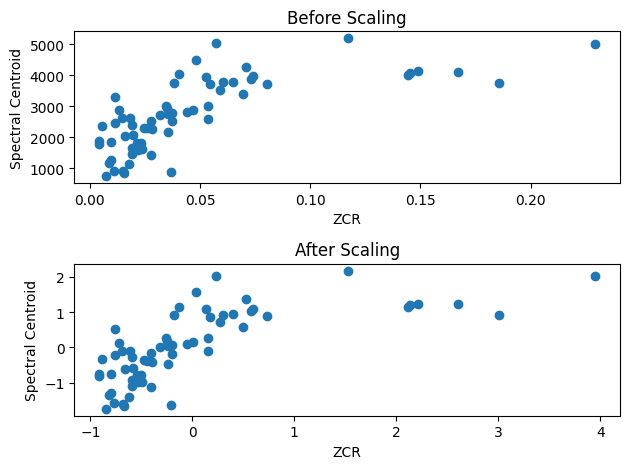

In [101]:
plt.subplot(2,1,1)
plt.scatter(X_train[:,0], X_train[:,1])
plt.xlabel('ZCR')
plt.ylabel('Spectral Centroid')
plt.title('Before Scaling')

plt.subplot(2,1,2)
plt.scatter(X_train_sc[:,0], X_train_sc[:,1])
plt.xlabel('ZCR')
plt.ylabel('Spectral Centroid')
plt.title('After Scaling')
plt.tight_layout()

#### 7.3 - Fitting the Model

Now we are ready to fit the model, using the `sklearn.linear_model.LogisticRegression` class.

In [102]:
from sklearn.linear_model import LogisticRegression

# Create the model object
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train_sc, y_train)

# Make predictions on the test data
y_hat_test = model.predict(X_test_sc)

We can compare our model predictions on the test data, with the true labels.

In [103]:
print(f'True Labels: {y_test}')
print(f'Predictions: {y_hat_test}')

True Labels: [0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0]
Predictions: [1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0]


#### 7.4 - Plotting the Decision Boundary

We can also use sklearn to visualise the decision boundary of the resulting model, using the `sklearn.inspectionDecisionBoundaryDisplay` class.

Text(0, 0.5, 'Spectral Centroid')

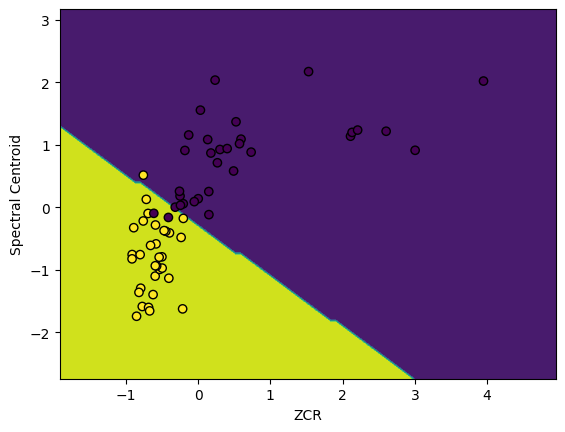

In [105]:
from sklearn.inspection import DecisionBoundaryDisplay
d = DecisionBoundaryDisplay.from_estimator(model, X_train_sc, 
                                                              response_method='predict')
d.ax_.scatter(X_train_sc[:, 0], X_train_sc[:, 1], edgecolor="k", 
              c = y_train)
plt.xlabel('ZCR')
plt.ylabel('Spectral Centroid')

### ✏️✏️ Exercise: Interpreting the Plot ✏️✏️

Look at the plot above, and answer the following:
- Are there any misclassified points in the decision boundary plot?
- Which points will have the highest and lowest Binary Cross-Entropy loss?

## Further Work

If you wish to go further, here are some ideas for things you can try (in no particular order!):

- Confidence-based evaluation: use predict_proba to look at the model’s confidence. Plot a histogram of predicted probabilities for each class and identify “uncertain” clips (e.g., probabilities near 0.5).
- Coefficient interpretation: inspect logistic regression coefficients (model.coef_). Explain which feature pushes the prediction toward snare vs bass and why that makes sense physically.
- Feature engineering:
 - add RMS energy or signal peak as a 3rd feature
 - use a log transform of centroid/ZCR as a feature, and compare separation/accuracy
- Data augmentation: duplicate training samples with small noise perturbations (e.g., add low-level Gaussian noise or small gain changes), see how performance changes